# 一元线性回归

    只有一个影响因素
$$ y = \beta_0x_0 + e
$$
目的是通过一组已知的$y$和$x$，求对应的$\beta$和$e$

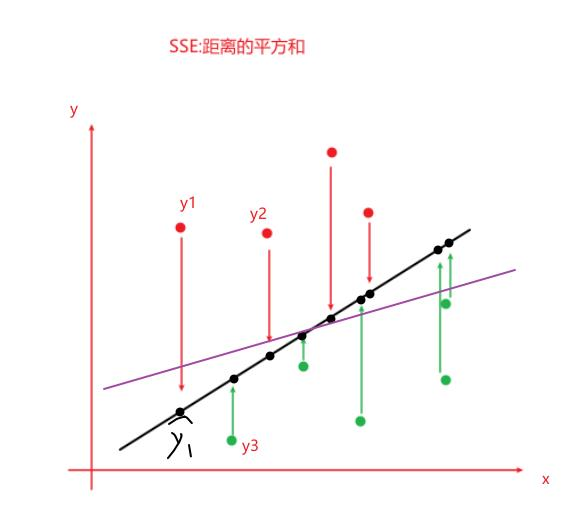

## 1.载入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 导入与线性回归相关模块
from sklearn import linear_model
import sklearn.metrics

## 2.载入数据，做简单的观察

In [7]:
data = pd.read_csv('data/regression_data.txt')

In [8]:
data

,height,weight
0,170,59.0
1,171,65.7
2,179,70.1
3,177,70.2
4,165,55.8
5,168,60.3
6,161,53.3
7,182,73.1
8,164,55.8
9,166,61.3


利用身高预测体重

利用散点图观察身高和体重之间的关系

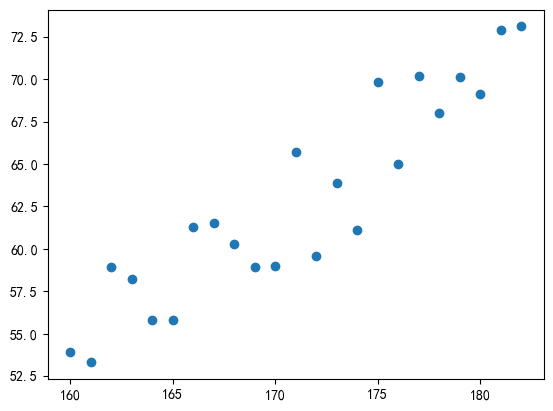

In [9]:
plt.scatter(
    data.height,
    data.weight
)

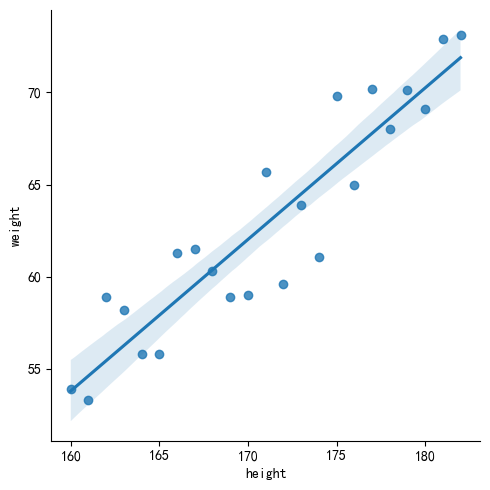

In [10]:
sns.lmplot(
    x = 'height',
    y = 'weight',
    data = data
)

In [11]:
data.corr()

,height,weight
height,1.000000,0.921446
weight,0.921446,1.000000


## 3.训练模型

In [12]:
# 指定x和y
train_x = data[['height']]
train_y = data[['weight']]

In [13]:
reg_model = linear_model.LinearRegression()
# 采用默认参数构建回归模型

In [14]:
reg_model.fit(train_x, train_y)
# 训练模型

LinearRegression()

In [15]:
dir(reg_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

## 4.观察模型的信息

In [16]:
print('回归系数：', reg_model.coef_)
print('截距：', reg_model.intercept_)

回归系数： [[0.8208498]]
截距： [-77.52183794]


利用回归系数和截距，可以构建出体重相对于身高的回归模型
$$ 
体重 = 0.8208498 * 身高 - 77.5218 
$$

## 5.利用构建好的模型绘制拟合线

获取预测结果

In [17]:
pred_y = reg_model.predict(train_x)

In [18]:
pred_y

array([[62.02262846],
       [62.84347826],
       [69.41027668],
       [67.76857708],
       [57.91837945],
       [60.38092885],
       [54.63498024],
       [71.87282609],
       [57.09752964],
       [58.73922925],
       [68.58942688],
       [59.56007905],
       [56.27667984],
       [55.45583004],
       [71.05197628],
       [65.30602767],
       [70.23112648],
       [53.81413043],
       [64.48517787],
       [63.66432806],
       [66.12687747],
       [61.20177866],
       [66.94772727]])

绘制带有拟合线的散点图

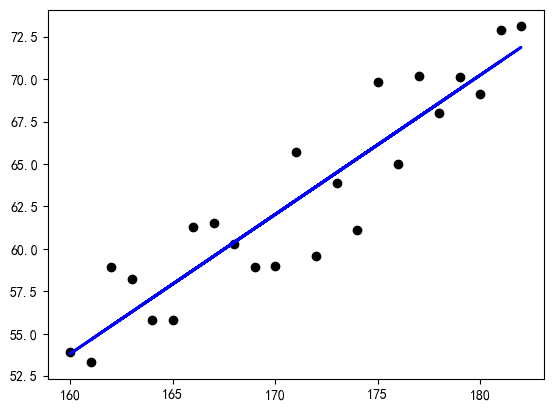

In [19]:
# 先使用实际数据绘制散点图
plt.scatter(
    train_x,
    train_y,
    color = 'k'
)

# 再使用预测出来的y和原始的x绘制拟合线
plt.plot(
    train_x.values.reshape(-1),
    pred_y.reshape(-1),
    color = 'blue',
    lw = 2
)
plt.show()

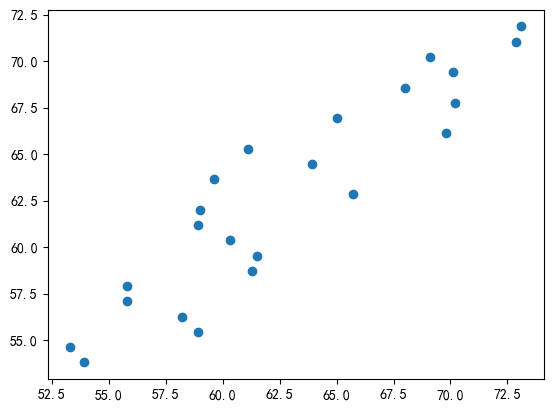

In [20]:
plt.scatter(
    train_y,
    pred_y
)
# QQ图